In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('survey lung cancer.csv')
df.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
df.shape

(309, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [6]:
df.describe(include=["object"])

,GENDER,LUNG_CANCER
count,309,309
unique,2,2
top,M,YES
freq,162,270


In [7]:
df.duplicated().sum()

np.int64(33)

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [9]:
df["LUNG_CANCER"].value_counts(normalize=True)

LUNG_CANCER
YES    0.862319
NO     0.137681
Name: proportion, dtype: float64

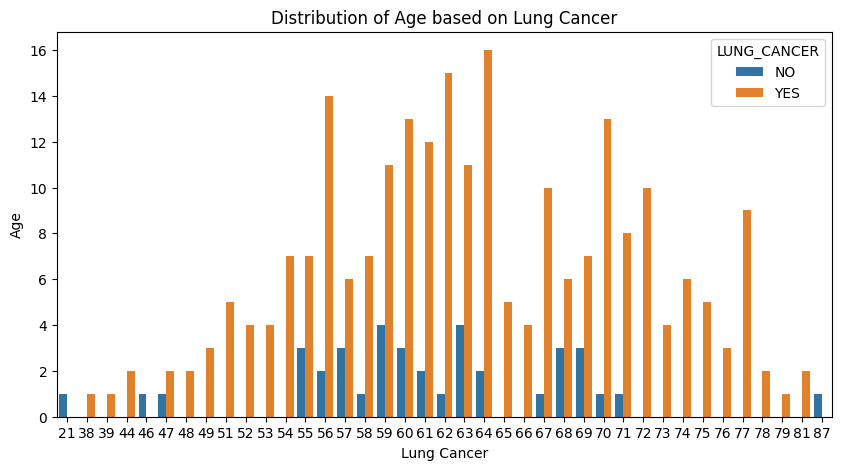

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(x='AGE',hue='LUNG_CANCER', data=df)
plt.title(f'Distribution of Age based on Lung Cancer')
plt.xlabel('Lung Cancer')
plt.ylabel('Age')
plt.show()

In [11]:
categorical_data=df.drop('AGE',axis='columns')


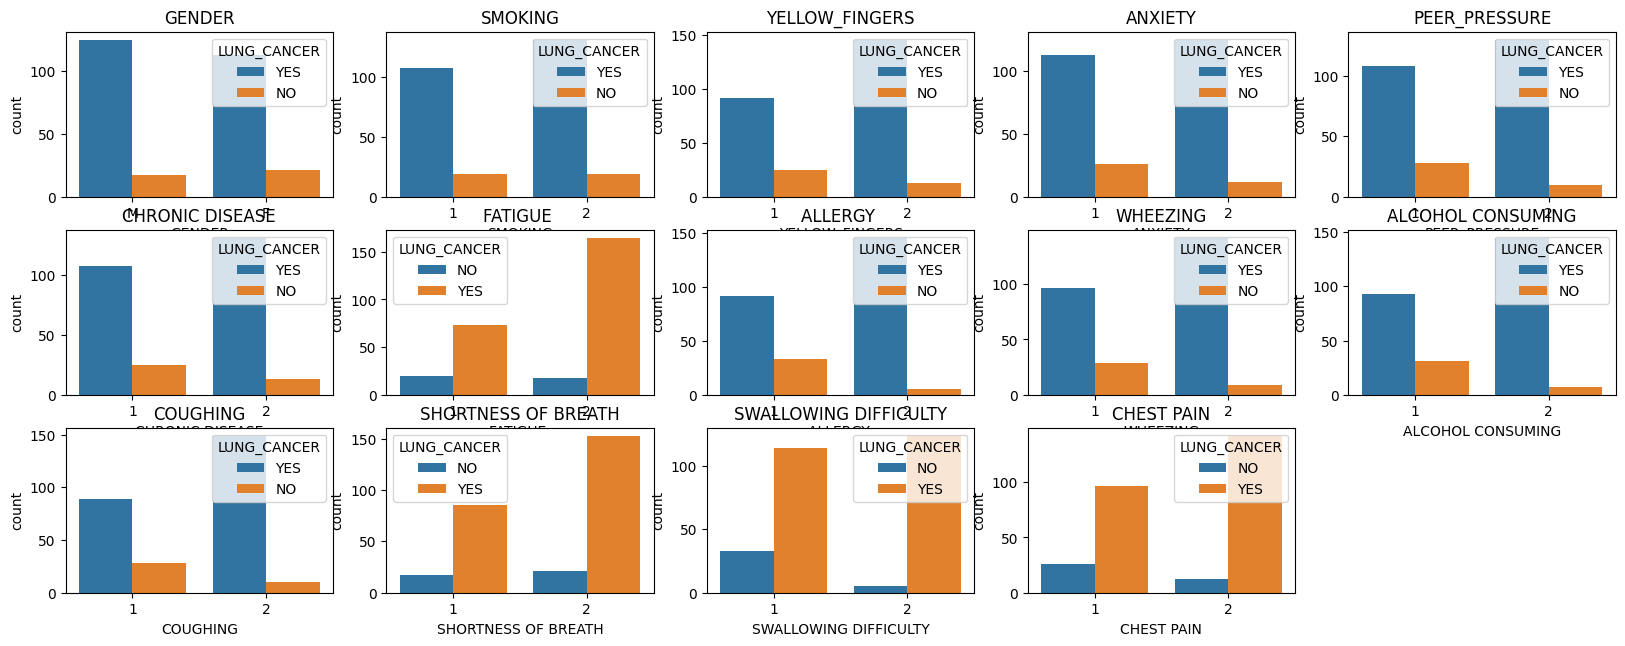

In [12]:
list=['GENDER','SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']
fig = plt.figure(figsize=(20,15))

for i in range(len(list)):
    plt.subplot(6,5,i+1)
    plt.title(list[i])
    sns.countplot(data=categorical_data,x=categorical_data[list[i]],hue='LUNG_CANCER')

In [13]:
label_encoder = LabelEncoder()
df['GENDER'] = label_encoder.fit_transform(df['GENDER'])

print("Mapping of labels to integers:")
for label, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{label}: {encoded_value}")

Mapping of labels to integers:
F: 0
M: 1


In [14]:
label_encoder = LabelEncoder()
df['LUNG_CANCER'] = label_encoder.fit_transform(df['LUNG_CANCER'])

print("Mapping of labels to integers:")
for label, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{label}: {encoded_value}")

Mapping of labels to integers:
NO: 0
YES: 1


In [15]:
correlation_matrix = df.corr()
target_correlation = correlation_matrix['LUNG_CANCER']
print(target_correlation)


GENDER                   0.053666
AGE                      0.106305
SMOKING                  0.034878
YELLOW_FINGERS           0.189192
ANXIETY                  0.144322
PEER_PRESSURE            0.195086
CHRONIC DISEASE          0.143692
FATIGUE                  0.160078
ALLERGY                  0.333552
WHEEZING                 0.249054
ALCOHOL CONSUMING        0.294422
COUGHING                 0.253027
SHORTNESS OF BREATH      0.064407
SWALLOWING DIFFICULTY    0.268940
CHEST PAIN               0.194856
LUNG_CANCER              1.000000
Name: LUNG_CANCER, dtype: float64


In [16]:
Q1 = df.AGE.quantile(0.25)
Q3 = df.AGE.quantile(0.75)
Q1, Q3


(np.float64(57.75), np.float64(69.0))

In [17]:
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(np.float64(40.875), np.float64(85.875))

In [18]:
#OUTLIERS
df[(df.AGE<lower_limit)|(df.AGE>upper_limit)]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
22,0,21,2,1,1,1,2,2,2,1,1,1,2,1,1,0
238,0,38,1,2,1,1,2,2,2,2,1,2,2,1,2,1
261,1,39,2,1,1,2,1,2,2,2,2,1,2,1,2,1
277,0,87,1,1,1,1,2,2,1,1,1,1,2,1,1,0


In [19]:
# New data without Outliers
new_df = df[(df.AGE>lower_limit)&(df.AGE<upper_limit)]

In [20]:
X=new_df.drop('LUNG_CANCER',axis='columns')
y=new_df['LUNG_CANCER']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=47)


In [22]:
DTC = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

DTC_GSCV = GridSearchCV(estimator=DTC, param_grid=param_grid, cv=5, scoring='accuracy')
DTC_GSCV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [23]:
DTC_GSCV.score(X_train , y_train)

0.9216589861751152

In [24]:
print('Actual Values:')
actual_values = np.array(y_test)
print(actual_values)
print('\nDesicion Tree Predictions:')
DTC_Pred = DTC_GSCV.predict(X_test)
DTC_Pred


Actual Values:
[1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]

Desicion Tree Predictions:


array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [25]:
DTC_accuracy=accuracy_score(y_test,DTC_Pred)
DTC_accuracy

0.8909090909090909

In [26]:
print(classification_report(y_test,DTC_Pred))

              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.96      0.92      0.94        49

    accuracy                           0.89        55
   macro avg       0.73      0.79      0.75        55
weighted avg       0.91      0.89      0.90        55



In [27]:
RFC = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

RFC_GSCV = GridSearchCV(estimator=RFC, param_grid=param_grid, cv=5, scoring='accuracy')

RFC_GSCV.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [28]:
RFC_GSCV.score(X_train , y_train)

1.0

In [29]:
print('Actual Values:')
actual_values = np.array(y_test)
print(actual_values)
print('\nDesicion Tree Predictions:')
RFC_Pred = RFC_GSCV.predict(X_test)
RFC_Pred

Actual Values:
[1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]

Desicion Tree Predictions:


array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [30]:
RFC_accuracy=accuracy_score(y_test,RFC_Pred)
RFC_accuracy

0.9454545454545454

In [31]:
print(classification_report(y_test,RFC_Pred))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.96      0.98      0.97        49

    accuracy                           0.95        55
   macro avg       0.88      0.82      0.85        55
weighted avg       0.94      0.95      0.94        55



In [32]:
SVC = SVC()
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

SVC_GSCV = GridSearchCV(estimator=SVC, param_grid=param_grid, cv=5, scoring='accuracy')

SVC_GSCV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [33]:
SVC_GSCV.score(X_train , y_train)

0.9354838709677419

In [34]:
print('Actual Values:')
actual_values = np.array(y_test)
print(actual_values)
print('\nSVM Tree Predictions:')
SVC_Pred = SVC_GSCV.predict(X_test)
SVC_Pred

Actual Values:
[1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]

SVM Tree Predictions:


array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [35]:
SVC_accuracy=accuracy_score(y_test,SVC_Pred)
SVC_accuracy

0.9272727272727272

In [36]:
print(classification_report(y_test,SVC_Pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.96      0.96      0.96        49

    accuracy                           0.93        55
   macro avg       0.81      0.81      0.81        55
weighted avg       0.93      0.93      0.93        55



Since The Accuracy of Random Forest Model is highest So we used it For Predictions In our APP

In [37]:
pickle_out = open("RandomForestClassifier.pkl","wb")
pickle.dump(RFC_GSCV, pickle_out)
pickle_out.close()